# Retina Blood Vessels Detection

### Notebook's imports

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cv2
from classifiers.classic import ClassicClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
%matplotlib inline

# Classic method

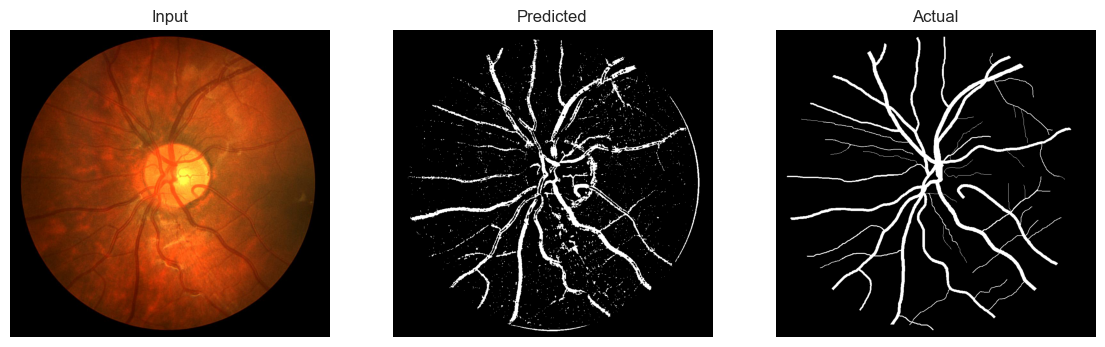

Accuracy:    0.9489948281614948
Recall:      0.6694475592434777
Specificity: 0.969952530670119


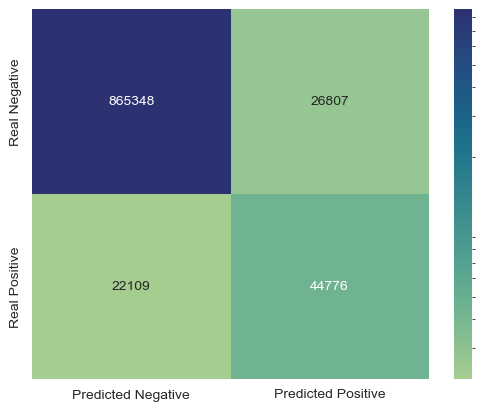

In [6]:
# Create Classifier and predict
cc = ClassicClassifier([(5, 5), (12, 12), (20, 20)], 200)
image = cv2.imread("../data/CHASED/Image_01L.jpg")
test_image = cv2.imread("../data/CHASED/Image_01L_1stHO.png", cv2.IMREAD_GRAYSCALE)
pred_image = cc.predict(image)

# Plot results
fig = plt.figure(figsize=(14, 10))
fig.add_subplot(131)
plt.title("Input")
plt.imshow(image[:,:,::-1])
plt.axis('off')

fig.add_subplot(132)
plt.title("Predicted")
plt.imshow(pred_image, cmap='gray')
plt.axis('off')

fig.add_subplot(133)
plt.title("Actual")
plt.imshow(test_image, cmap='gray')
plt.axis('off')
plt.show()

# Calculate confusion matrix
confusion_m = confusion_matrix(test_image.flatten(), pred_image.flatten())
tn, fp, fn, tp = confusion_m.ravel()

accuracy = (tp + tn) / (tn + fp + fn + tp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
specificity = tn / (tn + fp)

print(f"{'Accuracy:'.ljust(13, ' ')}{accuracy}")
print(f"{'Recall:'.ljust(13, ' ')}{recall}")
print(f"{'Specificity:'.ljust(13, ' ')}{specificity}")
df_cm = pd.DataFrame(confusion_m, index=['Real Negative', 'Real Positive'], columns=['Predicted Negative', 'Predicted Positive'])
sns.heatmap(df_cm, annot=True, fmt=".0f", norm=LogNorm(), cmap='crest', cbar_kws={'ticks': []})
plt.show()